## lambda函数
lambda保留字：用来定义一种特殊的函数——匿名函数，又称lambda函数。

匿名函数并非没有名字，而是将函数名作为函数结果返回：
<函数名> = lambda <参数列表>: <表达式>

lambda函数与正常函数一样，等价于下面形式
```Python
def <函数名>(<参数列表>):
    return <表达式>
```


In [2]:
f = lambda x, y: x ** y
print(type(f))
print(f(2,3))

<class 'function'>
8


In [3]:
def f():
    g()
def g():
    print("This is g")
f()

This is g


这段代码反映了Python的 **运行时名字解析（动态绑定）** 特性，具体表现为：

---

### 一、核心特点：**后定义函数可被前定义函数调用**
```python
def f():    # 此时g尚未定义
    g()     # 但函数体中的g在调用时才解析

def g():    # g的定义在f之后
    print("This is g")

f()         # 执行时g已存在 → 正常调用
```

---

### 二、原理分析
1. **函数定义顺序无关性**
   Python的函数体代码在 **定义时不会执行**，只有在 **调用时才会执行**。当`f()`被调用时，解释器才会解析`g()`，而此时`g`已经被定义。

2. **名字解析机制**
   Python使用 **动态名字查找（dynamic name lookup）**：
   - 在`f`被调用时，才会在当前作用域链中查找`g`
   - 此时`g`已存在于全局命名空间 → 调用成功

3. **对比静态语言**
   如C语言要求前向声明：
   ```c
   void g(); // 必须前置声明
   void f() { g(); }
   void g() { printf("This is g"); }
   ```

---

### 三、潜在风险验证
若`g`未定义时调用`f`，会触发 **NameError**：
```python
def f():
    g()  # 此时g未定义

f()     # 报错 NameError: name 'g' is not defined
```

---

### 四、深层机制
1. **字节码验证**
   通过`dis`模块查看`f`的字节码：
   ```python
   import dis
   dis.dis(f)
   ```
   输出关键部分：
   ```
   2 LOAD_GLOBAL              0 (g)  # 运行时动态查找全局g
   4 CALL_FUNCTION            0
   ```
   证明`g`的查找发生在 **函数执行时**，而非定义时。

2. **作用域链规则**
   Python按照 LEGB 规则查找变量：
   - **L**ocal → **E**nclosing → **G**lobal → **B**uilt-in
   - 本案例中`g`属于全局（Global）作用域

---

### 五、典型应用场景
1. **相互递归调用**
   ```python
   def f(n):
       if n>0: g(n-1)  # 调用后定义的g

   def g(n):
       if n>0: f(n-1)  # 调用先定义的f
   ```

2. **插件式架构**
   ```python
   def process_data():
       plugin()  # 具体实现在后续定义

   # 根据需求动态加载插件
   if use_plugin_A:
       def plugin(): ...
   else:
       def plugin(): ...
   ```

---

### 六、总结对比
| 特性                | Python          | C/Java等静态语言  |
|---------------------|-----------------|------------------|
| 函数定义顺序         | 无关            | 必须前向声明     |
| 名字解析时机         | 运行时动态解析  | 编译时静态检查   |
| 函数体执行时机       | 调用时执行      | 编译时生成指令   |
| 错误检测             | 运行时NameError | 编译时报错       |

这种设计让Python具有更强的灵活性，但也要求开发者更注意 **执行时序** 和 **作用域管理**。

# 可选参数
在定义函数时，有些参数可以存在默认值
函数被调用时，如果没有传入对应的参数值，则使用函数定义时的默认值代替
可选参数必须定义在非可选参数后面


In [5]:
def ask(name,q="How are you?"):
    print(q,name,"?")
ask("James")

How are you? James ?


In [6]:
def ask(q="How are you?",name):
    print(q,name,"?")
ask("James")

SyntaxError: parameter without a default follows parameter with a default (1024585901.py, line 1)

## Python解释器是如何在函数内找到变量对应的值的？
- 首先在局部变量中查找
- 若找不到，则到上一级代码块中查找
- 最后会找到在没有缩进的代码块中定义的全局变量
- 若在函数内对变量进行赋值操作，则默认该变量是一个局部变量
- 使用global语句，可以改变赋值操作的默认行为，不生成局部变量
- 这样在函数内部就可以通过赋值语句更改全局变量的值了
- 产生新问题：一个变量可以既是全局变量又是局部变量？
- Python禁止了这种行为，抛出UnboundLocalError异常


In [11]:
name = "James"
def f():
    print(name)         # 这里是全局变量
    name = 'O.Henry'        # 试图创建局部变量
f()

UnboundLocalError: cannot access local variable 'name' where it is not associated with a value

## datetime库概述
以不同格式显示日期和时间是程序中最常用到的功能。Python提供了一个处理时间的标准函数库datetime，它提供了一系列由简单到复杂的时间处理方法。datetime库可以从系统中获得时间，并以用户选择的格式输出。
datetime库以类的方式提供多种日期和时间表达方式：
- datetime.date：日期表示类，可以表示年、月、日等
- datetime.time：时间表示类，可以表示小时、分钟、秒、毫秒等
- datetime.datetime：日期和时间表示的类，功能覆盖date和time类
- datetime.timedelta：时间间隔有关的类
- datetime.tzinfo：与时区有关的信息表示类

from datetime import datetime
使用datetime.now()获得当前日期和时间对象，使用方法如下：
         ```datetime.now()```
作用：返回一个datetime类型，表示当前的日期和时间，精确到微秒




In [23]:
from datetime import datetime           # 前一个是模块名,后一个是类名,这里仅导入类名
# import datetime      这是导入全部模块
datetime.now()

datetime.datetime(2025, 3, 17, 20, 9, 11, 31073)

In [32]:
someday = datetime(2025, 3, 14, hour=23, minute=15,second=30,microsecond=20)
# 使用datetime()构造一个日期和时间对象
someday

datetime.datetime(2025, 3, 14, 23, 15, 30, 20)

In [26]:
# 为了区别datetime库名，采用上例中的someday代替生成的datetime对象
someday.min     # 返回最小时间对象datetime.datetime(1, 1, 1, 0, 0)
# 第一个datetime指模块名,第二个指类名

datetime.datetime(1, 1, 1, 0, 0)

In [27]:
someday.max

datetime.datetime(9999, 12, 31, 23, 59, 59, 999999)

In [33]:
print(someday.year)
print(someday.month)
print(someday.day)
print(someday.hour)
print(someday.minute)
print(someday.second)
print(someday.microsecond)

print(someday.weekday())            # 从0开始数,少用         # 返回星期
print(someday.isoweekday())         # 从1开始数,符合习惯
print(someday.isoformat())

2025
3
14
23
15
30
20
4
5
2025-03-14T23:15:30.000020


strftime()格式化控制符
 ![strftime()格式化控制符
](pictures/datetime_strftime.jpg)

In [36]:
someday.strftime("%Y-%b-%d: %A")            # 高度自定义

'2025-Mar-14: Friday'

strftime()格式化字符串的数字左侧会自动补零，上述格式也可以与print()的格式化函数一起使用

In [39]:
anotherday = datetime(2025, 3, 1, hour=23, minute=1,second=8,microsecond=20)
anotherday.strftime("%Y-%m-%d: %A")

'2025-03-01: Saturday'

In [41]:
print("今天是{0:%Y}年{0:%m}月{0:%d}日.".format(anotherday))        # 只有一个元素(datetime类的实例),转义方式不同

今天是2025年03月01日.


## 数码管绘制
七段数码管（seven-segment indicator）由7段数码管拼接而成，每段有亮或不亮两种情况，改进型的七段数码管还包括一个小数点位置
七段数码管能形成2^7=128种不同状态，其中部分状态能够显示易于人们理解的数字或字母含义，因此被广泛使用

![](pictures/数码管.jpg)


In [2]:
# 仅仅实现最简单的形式,无点号,无年月日的中文,未设置颜色粗细等等,请你改进
# 你也可以有自己的思路!
from turtle import *
from datetime import datetime
def drawLine():
    forward(50)
    left(90)

def drawNumber(num):
    draw_ls = [1] * 7
    draw_ls[0] = 0 if num in [0,1,7] else 1
    draw_ls[1] = 0 if num in [5,6] else 1
    draw_ls[2] = 0 if num in [1,4] else 1
    draw_ls[3] = 0 if num in [1,2,3,7] else 1
    draw_ls[4] = 0 if num in [1,3,4,5,7,9] else 1
    draw_ls[5] = 0 if num in [1,4,7,9] else 1
    draw_ls[6] = 0 if num in [2] else 1
    # print(draw_ls)
    for i in range(7):
        if i == 4:
            right(90)
        pendown() if draw_ls[i] else penup()
        drawLine()

    penup()
    left(180)
    forward(30)

def get_time():
    now = datetime.now()
    now_ls = now.strftime("%Y%m%d")
    now_ls = [int(c) for c in now_ls]
    return now_ls

def draw(now_ls):
    width, height = 800, 600
    setup(width=width, height=height)
    penup()
    goto(-(width/2-100),0)
    pendown()

    for i in now_ls:
        drawNumber(i)

    penup()


now = get_time()
draw(now)
mainloop()

## 代码复用与模块化设计
模块化设计一般有两个基本要求：
- 紧耦合：尽可能合理划分功能块，功能块内部耦合紧密；
- 松耦合：模块间关系尽可能简单，功能块之间耦合度低。

使用函数只是模块化设计的必要非充分条件，根据计算需求合理划分函数十分重要。一般来说，完成特定功能或被经常复用的一组语句应该采用函数来封装，并尽可能减少函数间参数和返回值的数量。


## 递归
### 字符串反转

In [6]:
def reverse(s):
    if len(s) == 0:
        return ''
    else:
        return reverse(s[1:]) + s[0]

print(reverse(input("请输入需要反转的字符串:")))

院学学数学大民人国中


### 科赫曲线绘制
- 正整数n代表科赫曲线的阶数，表示生成科赫曲线过程的操作次数。科赫曲线初始化阶数为0，表示一个长度为L的直线。对于直线L，将其等分为三段，中间一段用边长为L/3的等边三角形的两个边替代，得到1阶科赫曲线，它包含四条线段。进一步对每条线段重复同样的操作后得到2阶科赫曲线。继续重复同样的操作n次可以得到n阶科赫曲线。
- 科赫曲线属于分形几何分支，它的绘制过程体现了递归思想.

![](pictures/科赫曲线.png)

In [ ]:
from turtle import *

def koch(dim,length):
    if dim == 0:
        forward(length)
    else:
        koch(dim-1,length/3)
        left(60)
        koch(dim-1,length/3)
        right(120)
        koch(dim-1,length/3)
        left(60)
        koch(dim-1,length/3)

def draw():
    w, h = 800, 800
    n = eval(input("你要生成科赫曲线的迭代阶数:"))
    setup(w,h)
    penup()
    speed(10)
    goto(-(w/2-100),w/5)
    pendown()

    koch(n,w-200)
    right(120)
    koch(n,w-200)
    right(120)
    koch(n,w-200)


    mainloop()

draw()

![](pictures/科赫曲线_5阶.png)

## 集合类型
- 集合类型与数学中集合的概念一致，即包含0个或多个数据项的无序组合。集合中元素不可重复，元素类型只能是固定数据类型，例如：整数、浮点数、字符串、元组等。列表、字典和集合类型本身都是可变数据类型，不能作为集合的元素出现。
- 由于集合是无序组合，它没有索引和位置的概念，不能分片，集合中元素可以动态增加或删除。集合用大括号（{}）表示，可以用赋值语句生成一个集合。
- 由于集合元素是无序的，集合的打印效果与定义顺序可以不一致。
- 由于集合元素独一无二，使用集合类型能够过滤掉重复元素。set(x)函数可以用于生成集合。



In [8]:
ls = [1,2,3,4,5,6,6,3,2,4,1,2,3,9,0,5,3,2,2,1]
ls_f = set(ls)
ls_f

{0, 1, 2, 3, 4, 5, 6, 9}

![](pictures/集合操作符.png)
![](pictures/集合的方法.png)

集合类型主要用于三个场景：成员关系测试、元素去重和删除数据项。
## 列表类型
列表可以同时使用正向递增序号和反向递减序号，可以采用标准的比较操作符（<、<=、==、!=、>=、>）进行比较，列表的比较实际上是单个数据项的逐个比较。
列表必须通过显式的数据赋值才能生成，简单将一个列表赋值给另一个列表不会生成新的列表对象。

## Jieba库
- 英文单词间有空格：split()分词
- jieba是Python中一个重要的第三方中文分词函数库
```import jieba```
- jieba库是第三方库，不是安装包自带，需要通过pip指令安装
```pip install jieba # pip3 install jieba```

![](pictures/jieba.png)


In [10]:
import jieba
jieba.lcut("中华人民共和国是一个伟大的国家!")

['中华人民共和国', '是', '一个', '伟大', '的', '国家', '!']

In [11]:
jieba.lcut("中华人民共和国是一个伟大的国家!",cut_all=True)

['中华',
 '中华人民',
 '中华人民共和国',
 '华人',
 '人民',
 '人民共和国',
 '共和',
 '共和国',
 '国是',
 '一个',
 '伟大',
 '的',
 '国家',
 '!']

## 文本文件打开和读取
文本文件打开、读取
- open() 函数用于打开一个文件，创建一个 file 对象
                           ```open(file, mode=‘r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True)```
常用参数：
- file : 一个包含了你要访问的文件名称的字符串值；
- mode : mode 决定了打开文件的模式：只读，写入，追加等
- Encoding：表示的是返回的数据采用何种编码，一般采用utf8或者gbk
- Read() 函数用于读取文件

## 词频统计



In [14]:
txt = open(r"D:\Myself\Codefield\Code_Python\Code_Ai_Python\Class_Notes\文件\高瓴人工智能学院简介.txt","r",encoding="utf-8")
print(txt)

<_io.TextIOWrapper name='D:\\Myself\\Codefield\\Code_Python\\Code_Ai_Python\\Class_Notes\\文件\\高瓴人工智能学院简介.txt' mode='r' encoding='utf-8'>


In [15]:
content = txt.read()  # 读取全部内容为字符串
print(content)
txt.close()  # 必须手动关闭文件

“过去未去，未来已来”，在构建人工智能时代的宏大世界观时，在影响人工智能技术发展的历史趋势时，在吸纳和培养人工智能领域的顶尖学者和实践者时，中国人民大学高瓴人工智能学院应运而生，并将扮演至关重要的角色。

高瓴人工智能学院是中国人民大学下属学院，承担学校人工智能学科的规划与建设，开展本学科和相关交叉学科领域的本、硕、博人才培养和科学研究工作。学院由高瓴资本创始人兼首席执行官、耶鲁大学校董、中国人民大学校友张磊先生捐资支持建设。

高瓴人工智能学院学术委员会主任由中国工程院原常务副院长、国家新一代人工智能战略咨询委员会主任潘云鹤院士担任，执行院长由中国人民大学信息学院院长文继荣教授担任。

学院愿景

打造一所能够影响和塑造未来人工智能时代的世界一流学院，为全球思考并创造“智能而有温度”的未来。

发展目标

创新一流体制机制、打造一流师资队伍、培养一流专业人才、产出一流科研成果。

主要任务

推动人工智能基础理论和技术研究；探索建立新型交叉研究中心，促进人文社科与人工智能的深度融合；联合各界设立联合研究中心和实验室，与全球知名人工智能企业联合打造专项人才培养计划，鼓励创新和产业化，促进凝聚广泛共识的人工智能全球对话。


In [18]:
# 使用列表进行词频统计
import jieba
txt = open(r"D:\Myself\Codefield\Code_Python\Code_Ai_Python\Class_Notes\文件\高瓴人工智能学院简介.txt","r",encoding="utf-8").read()
words = jieba.lcut(txt)
uniquewords = list(set(words))

counts = [0] * len(uniquewords)
for i in range(len(uniquewords)):
    counts[i] = words.count(uniquewords[i])
for i in range(len(uniquewords)):
    print("{0:<10}{1:>5}".format(uniquewords[i],counts[i]))

时代            2
由             2
学科            1
兼             1
将             1
相关            1
战略            1
博             1
的            10
院士            1
本学科           1
学校            1
未来            3
有             1
中心            2
培养            2
领域            2
过去            1
全球            3
创始人           1
委员会           2
探索            1

            16
研究            3
产业化           1
，            14
吸纳            1
院长            3
专项            1
校董            1
塑造            1
校友            1
推动            1
去             1
中国人民大学        4
学院            8
并             2
已来            1
温度            1
技术            2
体制            1
深度            1
张磊            1
知名            1
首席            1
承担            1
打造            3
；             2
“             2
联合            3
”             2
、             8
基础理论          1
硕             1
文继荣           1
高瓴            3
而             1
担任            2
。             7
任务            1
人才培养          2
影响            2
专业人才    

In [20]:
# 使用字典方法进行词频统计
counts = {}         # 这是字典,不是集合!
for word in uniquewords:
    counts[word] = words.count(word)
for word in counts:
    print("{0:<10}{1:>5}".format(word,counts[word]))

时代            2
由             2
学科            1
兼             1
将             1
相关            1
战略            1
博             1
的            10
院士            1
本学科           1
学校            1
未来            3
有             1
中心            2
培养            2
领域            2
过去            1
全球            3
创始人           1
委员会           2
探索            1

            16
研究            3
产业化           1
，            14
吸纳            1
院长            3
专项            1
校董            1
塑造            1
校友            1
推动            1
去             1
中国人民大学        4
学院            8
并             2
已来            1
温度            1
技术            2
体制            1
深度            1
张磊            1
知名            1
首席            1
承担            1
打造            3
；             2
“             2
联合            3
”             2
、             8
基础理论          1
硕             1
文继荣           1
高瓴            3
而             1
担任            2
。             7
任务            1
人才培养          2
影响            2
专业人才    

## 大作业1：二维卷积操作对图片进行处理
### 什么是卷积？
- 两个函数𝑓和𝑔生成第三个函数的一种数学算子
- 𝑓与经过翻转和平移的𝑔的乘积函数所围成的曲边梯形的面积(滑动平均)
![](./pictures/卷积.png)
### 离散卷积举例：2个骰子点数和为4的概率
- 两枚骰子,骰子未必都是公平
- 第一个骰子出现点i (i = 1, 2, …, 6) 的概率为f(i)
- 第二个骰子出现点i的概率为g(i)
- 把这两枚骰子都抛出去,求2个骰子点数和为4的概率
- $$(𝑓∗𝑔)(4)=\sum_{m=1}^3 f(m)g(4-m)$$



In [22]:
# Python实现一维卷积
l1 = [1/6] * 6
l2 = [1/6] * 6

conv = 0
for i in range(3):
    conv += l1[i] * l2[5-i]
print(conv)

0.08333333333333333


### 大作业：用列表实现二维卷积
一、二维卷积
用一个h×w大小的卷积核矩阵K和一个H×W大小的图像矩阵im进行二维卷积操作包括如下步骤：
1.	翻转核矩阵
输入: 原始矩阵K
输出：翻转后的矩阵K′
方法：横向翻转 + 纵向翻转
K′[i][j]=K[h−i−1][w−j−1]
其中，h为K矩阵的行数（列表长度）；w为K矩阵的列数(列表中每个元素的长度)


2.	按指定步长在不同位置计算响应值
输入：图像矩阵𝑖𝑚，翻转后的核矩阵K′，步长stride
输出：卷积后的图像矩阵𝑖𝑚’
方法：


用翻转后的卷积核K′，从左上角开始，在图像上从左到右、从上到下滑动：每次向右滑动移动的步长由stride指定；当滑动后的卷积核超出图像区域结束该行滑动，向下移动步长stride，再次从左向右滑动；直到滑动到右下角。在每个位置（卷积核左上角对齐到图像（i，j）位置处），将K′和其覆盖的im的对应位置的元素相乘并求和，作为这个位置的响应值。所有位置的响应值按位置顺序组成的矩阵𝑖𝑚’（列表的列表）。


9*7      4*3       6*5       3*3(stride = 2)
二、作业
实现图片二维卷积函数conv2d(im, K, stride=1)
输入：图像转换成的由list表示的二维数组im；另一个由list表示的二维数组K；步长stride；
输出：卷积后的列表表示的二维数组

说明：
1. 下载Jupyter Notebook代码 “第3周大作业1_题目.ipynb”和图片“ruc.jpg”
2. 阅读已有的代码（已有代码负责读入图片、转换为二维数值列表以及将二维数值列表转换为图片进行输出）
3. 编写代码，实现conv2d(im, K, stride)函数，其中stride步长，默认为1
	完成K矩阵的翻转操作
	完成对im矩阵的卷积操作，返回卷积后的二维数值列表
4. 观察在不同卷积核下输出图片的差异

    可以用下述测试用例检验conv2d函数是否正确：
例1：输入im = [[1, 1, 0, 0],
             [1, 1, 0, 0],
             [0, 0, 1, 1],
             [0, 0, 1, 1]]
         K = [[1, 1],
              [1, 1]]
        stride = 2
     输出：
         [[4, 0],
          [0, 4]]

例2：输入
im = [[ 8, -1, -8,  2,  3, -9, -2,  5,  5,  5, -8],
       [ 8,  2, -8, -4,  1,  7,  6, -7,  8, -4, -6],
       [ 5,  7, -1,  2,  1, -7, -4,  1, -1,  1,  0],
       [-3,  0, -2, -2, -5, -4, -7,  5,  0, -3, -1],
       [-5,  0,  3,  1, -1,  4,  8, -2, -3, -8,  5],
       [-2, -7, -6, -3, -3, -3,  2,  5, -7,  7,  3],
       [ 8, -9, -3,  3,  0, -4, -6, -8,  6, -8, -7],
       [-6,  0,  0,  8,  3, -6,  1,  8, -2,  2,  7],
       [-4, -8,  6, -3, -9,  2, -5, -4, -9,  0, -5],
       [-6,  4, -1,  0, -4,  7,  4,  5,  0, -4, -6],
       [ 6,  4,  2, -4,  7,  4,  8, -5, -1, -7, -5]]

K = [[ 5, -3,  3,  5,  7],
       [ 0, -9,  8, -8, -8],
       [ 6,  6,  1, -5,  3],
       [-3, -9,  5,  0,  1],
       [ 1, -9, -6,  0,  8]]

        stride =1
     输出：
         [[87, -26, -86, 134, 99, -71, 118],
[57, -80, -238, -198, 24, 11, -46],
[81, 97, 201, 162, -73, -147, -249],
[-102, 130, 77, 164, 35, -69, 356],
[-90, 27, -99, -430, -197, 251, -221],
[184, 137, -151, 270, 68, 64, 165],
[53, -125, 34, 45, 2, -54, -113]]

Stride=2
[[87, -86, 99, 118], [81, 201, -73, -249], [-90, -99, -197, -221], [53, 34, 2, -113]]



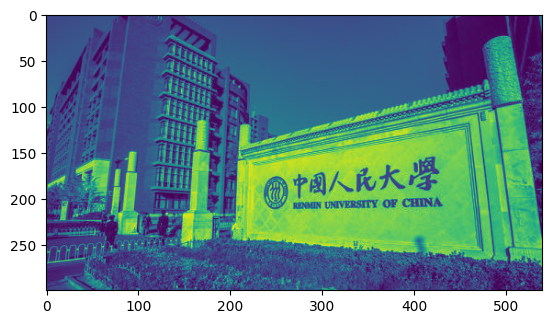

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#输入图像
im = np.array(Image.open('ruc.jpg').convert('L'))
plt.imshow(im)
plt.show()
# im是输入图像转换成的list
im = im.tolist()

# ker是卷积核对应的list
ker = np.array([[1,1,1,-1,-1],
                [1,0,0,0,-1],
                [1,0,0,0,-1],
                [1,0,0,0,-1],
                [1,1,1,-1,-1]])

ker = ker.tolist()
#print(ker)

#print(len(im),len(im[0]))

In [8]:
def conv2d(im, kernel, stride=1):             # 第一种代码实现: 使用列表推导式简化代码
    # 翻转卷积核（垂直+水平翻转）
    kernel = [row[::-1] for row in reversed(kernel)]
    h, w = len(kernel), len(kernel[0])
    H, W = len(im), len(im[0])

    # 计算输出尺寸
    out_h = (H - h) // stride + 1
    out_w = (W - w) // stride + 1

    # 生成输出矩阵（列表推导式优化）
    return [
        [
            # 计算单个窗口的卷积值
            sum(
                im[i * stride + di][j * stride + dj] * kernel[di][dj]
                for di in range(h)
                for dj in range(w)
            )
            for j in range(out_w)  # 列方向滑动
        ]
        for i in range(out_h)  # 行方向滑动
    ]


def conv2d_1(im, kernel, stride =1):            # 第二种代码实现: 常规使用二维列表
    # 翻转核矩阵
    kernel_reversed = []
    for i in range(0,len(kernel)):
        kernel_reversed.append(kernel[len(kernel)-i-1][::-1])
    # print(len(kernel_reversed),len(kernel_reversed[0]))
    # print(kernel_reversed)
    # 计算响应值
    def cal(x,y):
        out = 0
        for i in range(0,len(kernel_reversed)):
            for j in range(0,len(kernel_reversed[i])):
                out += im[x+i][y+j] * kernel_reversed[i][j]
        return out

    im_out = []
    # H_out = (len(im) - h) // stride + 1
    # W_out = (len(im[0]) - w) // stride + 1
    for j in range(0,len(im)-len(kernel_reversed)+1,stride):
        im_out.append([])
        for k in range(0,len(im[0])-len(kernel_reversed[0])+1,stride):
            im_out[j].append(cal(j,k))
    # print(len(im_out),len(im_out[0]))
    return im_out


def conv2d_2(im, kernel, stride=1):             # 第三种代码实现: 将各参数预计算,代码思路更清晰
    # 翻转卷积核
    kernel_reversed = [row[::-1] for row in reversed(kernel)]
    h, w = len(kernel_reversed), len(kernel_reversed[0])
    H, W = len(im), len(im[0])

    # 计算输出维度
    H_out = (H - h) // stride + 1
    W_out = (W - w) // stride + 1

    # 响应值计算函数
    def cal(x, y):
        return sum(
            im[x + i][y + j] * kernel_reversed[i][j]
            for i in range(h)
            for j in range(w)
        )

    im_out = []
    for i in range(H_out):
        row = []
        start_row = i * stride  # 计算实际起始行
        for j in range(W_out):
            start_col = j * stride  # 计算实际起始列
            row.append(cal(start_row, start_col))
        im_out.append(row)

    return im_out

296
536


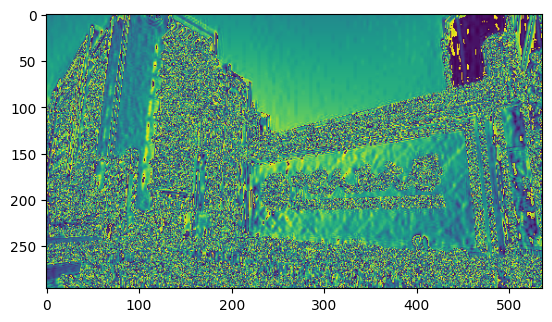

In [19]:
# 用ker铺im的处理结果，更改这行参数
im_out = conv2d(im,ker,1)

#显示处理后的图像
print(len(im_out))
print(len(im_out[0]))
im_out = np.array(im_out)
im1 = Image.fromarray(im_out.astype('uint8'))
plt.imshow(im1)
plt.show()



[[0.04, 0.04, 0.04, -0.04, -0.04], [0.04, 0.0, 0.0, 0.0, -0.04], [0.04, 0.0, 0.0, 0.0, -0.04], [0.04, 0.0, 0.0, 0.0, -0.04], [0.04, 0.04, 0.04, -0.04, -0.04]]


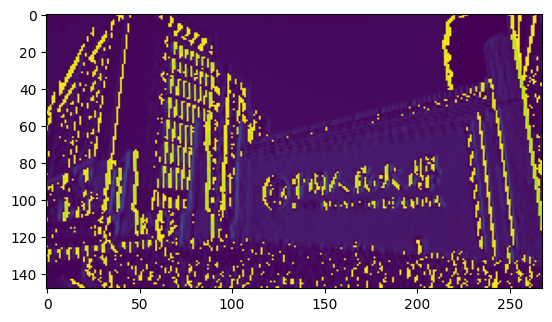

In [20]:
ker = np.array([[1,1,1,-1,-1],
                [1,0,0,0,-1],
                [1,0,0,0,-1],
                [1,0,0,0,-1],
                [1,1,1,-1,-1]])
ker2 = ker/25
ker2 = ker2.tolist()
print(ker2)

# 用ker2铺im的处理结果
im_out = conv2d(im,ker2,2)

# 显示处理后的图像
im_out = np.array(im_out)
im2 = Image.fromarray(im_out.astype('uint8'))
plt.imshow(im2)
plt.show()

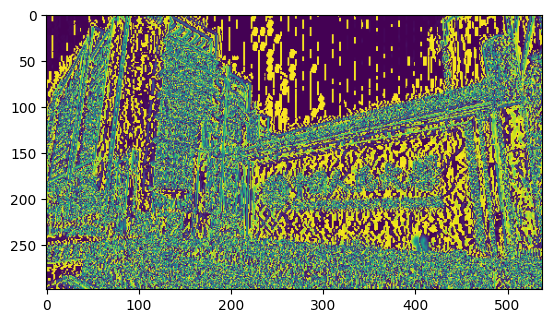

In [21]:
k3 =[[1, 0, -1],
     [2, 0, -2],
    [1, 0, -1]]
# 用ker2铺im的处理结果
im_out = conv2d(im,k3,1)

# 显示处理后的图像
im_out = np.array(im_out)
im2 = Image.fromarray(im_out.astype('uint8'))
plt.imshow(im2)
plt.show()

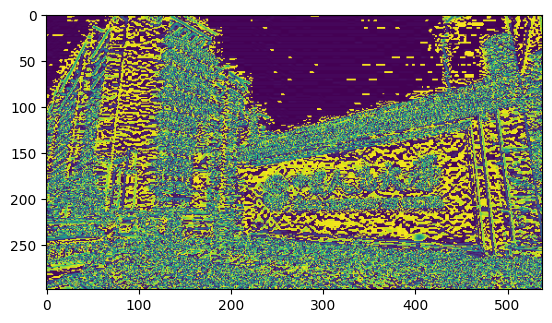

In [22]:
k3 =[[1, 2, 1],
     [0, 0, 0],
    [-1, -2, -1]]
# 用ker2铺im的处理结果
im_out = conv2d(im,k3,1)

# 显示处理后的图像
im_out = np.array(im_out)
im2 = Image.fromarray(im_out.astype('uint8'))
plt.imshow(im2)
plt.show()

In [23]:
im = [[ 8, -1, -8,  2,  3, -9, -2,  5,  5,  5, -8],
       [ 8,  2, -8, -4,  1,  7,  6, -7,  8, -4, -6],
       [ 5,  7, -1,  2,  1, -7, -4,  1, -1,  1,  0],
       [-3,  0, -2, -2, -5, -4, -7,  5,  0, -3, -1],
       [-5,  0,  3,  1, -1,  4,  8, -2, -3, -8,  5],
       [-2, -7, -6, -3, -3, -3,  2,  5, -7,  7,  3],
       [ 8, -9, -3,  3,  0, -4, -6, -8,  6, -8, -7],
       [-6,  0,  0,  8,  3, -6,  1,  8, -2,  2,  7],
       [-4, -8,  6, -3, -9,  2, -5, -4, -9,  0, -5],
       [-6,  4, -1,  0, -4,  7,  4,  5,  0, -4, -6],
       [ 6,  4,  2, -4,  7,  4,  8, -5, -1, -7, -5]]

K = [[ 5, -3,  3,  5,  7],
       [ 0, -9,  8, -8, -8],
       [ 6,  6,  1, -5,  3],
       [-3, -9,  5,  0,  1],
       [ 1, -9, -6,  0,  8]]

print(conv2d(im, K))
#print(conv2d(im, K, 2))

[[87, -26, -86, 134, 99, -71, 118], [57, -80, -238, -198, 24, 11, -46], [81, 97, 201, 162, -73, -147, -249], [-102, 130, 77, 164, 35, -69, 356], [-90, 27, -99, -430, -197, 251, -221], [184, 137, -151, 270, 68, 64, 165], [53, -125, 34, 45, 2, -54, -113]]


In [16]:
print(conv2d(im, K, 2))

[[87, -86, 99, 118], [81, 201, -73, -249], [-90, -99, -197, -221], [53, 34, 2, -113]]


In [24]:
im = [[1, 1, 0, 0],
             [1, 1, 0, 0],
             [0, 0, 1, 1],
             [0, 0, 1, 1]]
K = [[1, 1],
      [1, 1]]
print(conv2d(im, K, 2))

[[4, 0], [0, 4]]
